# POSTTEST4

# Import library pandas,numpy, sklearn dan membaca data csv

In [88]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv('tornados.csv')
df.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [90]:
df.shape

(68693, 27)

# Membagi dataset menjadi training set dan testing set dengan proporsi 70:30

In [91]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Dimensi X_train", X_train.shape)
print("Dimensi X_test", X_test.shape)
print("Dimensi y_train", y_train.shape)
print("Dimensi y_test", y_test.shape)

Dimensi X_train (48085, 26)
Dimensi X_test (20608, 26)
Dimensi y_train (48085,)
Dimensi y_test (20608,)


# Melihat Outlier

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


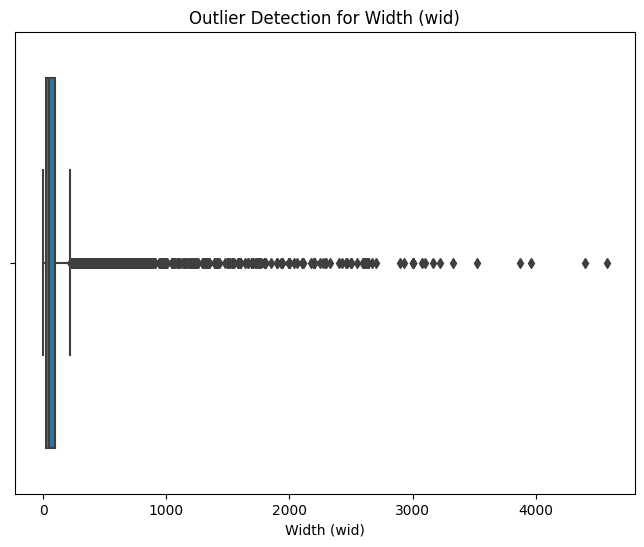

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat barplot untuk kolom 'wid' dengan Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_copy['wid'], orient='vertical')
plt.xlabel('Width (wid)')
plt.title('Outlier Detection for Width (wid)')
plt.show()


# Lakukan normalisasi data pada salah satu attribute menggunakan Min Max scaler (buatlah copy dataset terlebih dahulu

In [60]:
from sklearn.preprocessing import MinMaxScaler

data_copy = df.copy()

kolom_normalisasi = ['wid']


scaler = MinMaxScaler()

data_copy[kolom_normalisasi] = scaler.fit_transform(data_copy[kolom_normalisasi])
data_copy

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3000,15.80,0.002185,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0000,2.00,0.192308,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0000,0.10,0.002185,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0000,0.10,0.002185,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0000,2.00,0.008086,1,1,101,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68688,621922,2022,9,28,2022-09-28,13:32:00,America/Chicago,2022-09-28T18:32:00Z,FL,12,...,-80.8841,3.00,0.021853,1,1,9,0,0,0,False
68689,621923,2022,9,30,2022-09-30,10:25:00,America/Chicago,2022-09-30T15:25:00Z,NC,37,...,-78.3011,0.74,0.004371,1,1,19,0,0,0,False
68690,621924,2022,9,30,2022-09-30,13:22:00,America/Chicago,2022-09-30T18:22:00Z,NC,37,...,-76.7147,0.70,0.002622,1,1,13,0,0,0,False
68691,621900,2022,9,4,2022-09-04,15:44:00,America/Chicago,2022-09-04T20:44:00Z,OH,39,...,-80.6555,0.07,0.003278,1,1,99,0,0,0,False


In [61]:
data_copy['wid'].mean()

0.023550619056165477

# Lakukan standarisasi pada dataset (buatlah copy dataset terlebih dahulu

In [62]:
# Membuat salinan dataset
data_copy = df.copy()

# memilih atribut yang ingin di standarisasi
attribute_to_standardize = 'f1'

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Standarisasi atribut
data_copy[attribute_to_standardize] = scaler.fit_transform(data_copy[[attribute_to_standardize]])

# Menampilkan atribut 'Satisfaction Score' sebelum dan sesudah standarisasi
print("Atribut 'Satisfaction Score' Sebelum dan Sesudah Standarisasi:\n")
print("Sebelum Standarisasi:\n")
print(df[[attribute_to_standardize]].head(10))
print("\nSesudah Standarisasi:\n")
print(data_copy[[attribute_to_standardize]].head(10))

Atribut 'Satisfaction Score' Sebelum dan Sesudah Standarisasi:

Sebelum Standarisasi:

    f1
0   25
1   47
2  177
3  209
4  101
5   71
6  119
7  119
8   65
9  157

Sesudah Standarisasi:

         f1
0 -0.823197
1 -0.595806
2  0.747869
3  1.078620
4 -0.037664
5 -0.347743
6  0.148384
7  0.148384
8 -0.409758
9  0.541150


# Lakukan Data cleaning pada data dengan nilai null (jika tidak ada nilai null pada dataset, maka buatlah menjadi ada). Ganti nilai null sesuai ketentuan. (bilangan bulat : median/modus, bilangan desimal : mean, tulisan : modus).

In [63]:
df.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

In [65]:
# menghapus atribut nilai null
df.dropna(inplace=True) 
df.isna().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

# Mengubah bilangan bulat menjadi median/modus

In [69]:
data = pd.read_csv('tornados.csv')
strategi1 = SimpleImputer(strategy="median")

data["f1"] = strategi1.fit_transform(data[["f1"]])

data.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

# Mengubah bilangan desimal menjadi mean

In [70]:
import pandas as pd
data = pd.read_csv('tornados.csv')
from sklearn.impute import SimpleImputer
strategi2 = SimpleImputer(strategy="mean")

data["om"] = strategi2.fit_transform(data[["om"]])

data.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

# Mengubah tulisan menjadi modus

In [72]:
import pandas as pd
data = pd.read_csv('tornados.csv')
# Daftar kolom yang akan diisi dengan modus
kolom_tulisan = ['om','yr','mo', 'dy','date', 'time', 'tz', 'stf','st',]

# Loop melalui kolom-kolom tersebut dan ganti nilai null dengan modus
for kolom in kolom_tulisan:
    modus = data[kolom].mode()[0]  # Mengambil modus kolom
    data[kolom].fillna(modus, inplace=True)

data.isna().sum()

om                  0
yr                  0
mo                  0
dy                  0
date                0
time                0
tz                  0
datetime_utc        0
st                  0
stf                 0
mag               756
inj                 0
fat                 0
loss            27170
slat                0
slon                0
elat                0
elon                0
len                 0
wid                 0
ns                  0
sn                  0
f1                  0
f2                  0
f3                  0
f4                  0
fc                  0
dtype: int64

# cleaning duplicate

In [73]:
data[data.duplicated()]

print("Jumlah Data Duplikat : ")
data.duplicated().sum()

Jumlah Data Duplikat : 


1

# Karena tidak ada data nilai duplikat maka membuat nilai duplikat

In [78]:
data.drop_duplicates(inplace=True)

hasil = data.reset_index(drop=True)
print("Jumlah data duplicated setelah di drop :")
hasil.duplicated().sum()

Jumlah data duplicated setelah di drop :


0

# Ganti tipe data salah satu attribute angka

In [80]:
print("Tipe data points sebelum diubah :")
df["f1"].dtypes

Tipe data points sebelum diubah :


dtype('int64')

# Lakukan one hot encoding pada dataset yang kalian milik

In [85]:
import pandas as pd

df = pd.read_csv('tornados.csv')  # Gantilah 'tornadoes.csv' dengan nama file dataset Anda.
categorical_columns = ['fc']  # Ganti dengan nama kolom kategorikal dalam dataset Anda.
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False
